# Week 7-8 Assignment
Data 620

Spring 2020

Tamiko Jenkins, Calvin Wong


## Week Seven - Core Reading


Please read:

Natural Language Processing with Python, Chapters 3 and 4.
There is a lot of material in chapter 3, all core to text processing.  There is a version of this text (updated for Python 3 and NLTK 3)  here:  Steven Bird, Ewan Klein and Edward Loper (2014): Chapter 3: Natural Language Processing with Python.  http://www.nltk.org/book/ch03.html
Chapter 4 is mostly a review of some Python topics, and should be familiar material for most of you.

<img src="NLP Pipeline.jpg"> Source:  Natural Language Processing with Python, chapter 3.


## Week Eight - Core Reading
Please read:


Natural Language Processing with Python, Chapters 5 and 6.

## Week Eight - Assignment High Frequency Words
Attached Files:


File Assignment High Frequency Words.pdf (100.339 KB)


In this week's assignment, you are asked to analyze high frequency words.


Due end of day on Monday 3/22.

## Assignment – High Frequency Words


Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.

2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

3. Taking the most common words, how many unique words represent half of the total words in the corpus?

4. Identify the 200 highest frequency words in this corpus.

5. Create a graph that shows the relative frequency of these 200 words.

6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

## 1. Choose a corpus of interest.

### Import Libraries and Corpora

In [2]:
import nltk 
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.corpus import inaugural
from nltk.corpus import stopwords
import string

### Collect corpora, stopword, punctuation information
We look up the difference corpora available in nltk and choose to use the built in stopword list from nltk and punctuation list from the string library. There are many other options. 

In [3]:
stop_words = list(set(stopwords.words('english')))
punctuation = set(string.punctuation)
brown_cat_ids = brown.categories()
romance = brown_cat_ids[-2]
gutenberg_text_ids = gutenberg.fileids()
inaugural_text_ids = inaugural.fileids()

### Review corpora
We spend time finding basic statistics about our corpora, also reviewing the availability of tokenized versus raw text. 

In [4]:
# From book
print("average word length", "average sentence length", "lexical diversity", "text")
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

average word length average sentence length lexical diversity text
5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


## 2. How many total unique words are in the corpus? 
(Please feel free to define unique words in any interesting, defensible way).

### Get words from text
We have to choose a strategy to convert to words from raw text. Since we have an example of tokenized text (Brown, Romance), we use different strategies (split on white space or tokenize) to do so. We can also clean text with Regex, but use more generic methods below. We also don't Stem, Lematize or do any operations beyond what is included in the default tokenization previously applied to (Brown), or which is in the tokenize function of nltk (trump). 

http://www.ling.helsinki.fi/kit/2009s/clt231/NLTK/book/ch02-AccessingTextCorporaAndLexicalResources.html

In [5]:
romance_words = brown.words(categories=romance)
whit_text_raw = gutenberg.raw(gutenberg_text_ids[-1])
whit_words = [w.strip() for w in whit_text_raw.split() if not '']
trump_text_raw = inaugural.raw(inaugural_text_ids[-1])
trump_words = nltk.word_tokenize(trump_text_raw)

In [6]:
def print_corpora_info(name, idents, ident, words):
    print("\n{}:\n".format(name))
    print("Corpus categories/ids are:\n{}".format(", ".join(idents)))
    print("\nThere are {} words in {}, for instance:\n {}"\
                    .format(len(words), ident, ", ".join(words[:10])))


In [7]:
print_corpora_info("Brown", brown_cat_ids, romance, romance_words)
print_corpora_info("Gutenburg", gutenberg.fileids(), gutenberg.fileids()[-1], whit_words)
print_corpora_info("Inaugural", inaugural_text_ids, inaugural_text_ids[-1], trump_words)


Brown:

Corpus categories/ids are:
adventure, belles_lettres, editorial, fiction, government, hobbies, humor, learned, lore, mystery, news, religion, reviews, romance, science_fiction

There are 70022 words in romance, for instance:
 They, neither, liked, nor, disliked, the, Old, Man, ., To

Gutenburg:

Corpus categories/ids are:
austen-emma.txt, austen-persuasion.txt, austen-sense.txt, bible-kjv.txt, blake-poems.txt, bryant-stories.txt, burgess-busterbrown.txt, carroll-alice.txt, chesterton-ball.txt, chesterton-brown.txt, chesterton-thursday.txt, edgeworth-parents.txt, melville-moby_dick.txt, milton-paradise.txt, shakespeare-caesar.txt, shakespeare-hamlet.txt, shakespeare-macbeth.txt, whitman-leaves.txt

There are 122070 words in whitman-leaves.txt, for instance:
 [Leaves, of, Grass, by, Walt, Whitman, 1855], Come,, said, my

Inaugural:

Corpus categories/ids are:
1789-Washington.txt, 1793-Washington.txt, 1797-Adams.txt, 1801-Jefferson.txt, 1805-Jefferson.txt, 1809-Madison.txt, 1813-

### Discussion
Once we've gotten an idea of the words in our text, we perform text cleaning operations a produce some basic print outs of the results.
In practice, there are plenty of reasons to leave in punctuation, since it can often offer  insight into how to segment sentences or collocate words, if not insight into the meaning of the word itself (which it can sometimes change). For the purpose of this exercise, we want a basic idea of our text, so we strip all of the punctuation. 

In [8]:
def print_word_ops(prev=None, current=None):
    if prev is not None and current is not None:
        print("Example of removed words:\n{}".format(", ".join(list(set(prev)-set(current)))[:10]))
    if current is not None:
        print("Number of words: {}.\nFor instance:\n{}".format(len(current), 
                                                         ", ".join(current[:10]))) 
# More conservative punctuation removal
# Punctuation can be useful when creating collocations
#def not_a_punct(words):
#    # Whole words that are not punctuation
#    return [w for w in words if w not in punctuation if not '']

# We remove empty strings by default
def no_punct(words):
    translation = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(translation) for w in words]
    return [w.strip() for w in stripped if not '']

# We decide not to lowercase words, so the stopword list is only effective 
# with originally lowercase words, okay to illustrate the concept
def no_stopwords(words):
    return [w.strip() for w in words if w.strip() not in stop_words and not '']

def is_unique(words): 
    unique = list(set([w.lower().strip() for w in words]))
    return [w for w in unique if w!='']

def word_stats(title, words):
    print(title, "\n") 
    
    print("\nStripping all punctuation marks:")
    p_words = no_punct(words)
    print_word_ops(p_words, p_words)

    print("\nFinding words that are not stop words:")
    sp_words = no_stopwords(p_words)
    print_word_ops(p_words, sp_words)
        
    print("\nFraction of all content that is not a stop-word:{}".format(len(sp_words) / len(p_words)))
    
    print("\nFinding unique words:")
    up_words = is_unique(p_words)
    print_word_ops(p_words, up_words)
    
    
    # Return the list of all non-unique and unique words with stop words included
    return sp_words

### Cleaning a manually created word list from raw text

In [9]:
whit_clean_w = word_stats("Whitman Leaves of Grass, Gutenberg", whit_words)

Whitman Leaves of Grass, Gutenberg 


Stripping all punctuation marks:
Example of removed words:

Number of words: 122070.
For instance:
Leaves, of, Grass, by, Walt, Whitman, 1855, Come, said, my

Finding words that are not stop words:
Example of removed words:
where, to,
Number of words: 74062.
For instance:
Leaves, Grass, Walt, Whitman, 1855, Come, said, soul, Such, verses

Fraction of all content that is not a stop-word:0.6067174571966905

Finding unique words:
Example of removed words:
, Behrings
Number of words: 14568.
For instance:
stumpy, devours, sleepily, exhibits, boats, killinghammer, seaboard, pacifying, withdrawn, count


### Cleaning a pre-tokenized Corpora
Note that https://www.nltk.org/book/ch03.html states that Gutenberg texts have a long pre and post text that is added to the text. We can perform a regex or search to find the index of key words and slice the content to exclude these sections. For our purposes (showing rough differences among texts), we'll skip this operation for now.  

In [10]:
romance_clean_w = word_stats("Brown Romance Category", romance_words)

Brown Romance Category 


Stripping all punctuation marks:
Example of removed words:

Number of words: 70022.
For instance:
They, neither, liked, nor, disliked, the, Old, Man, , To

Finding words that are not stop words:
Example of removed words:
where, to,
Number of words: 44190.
For instance:
They, neither, liked, disliked, Old, Man, , To, could, broken

Fraction of all content that is not a stop-word:0.6310873725400589

Finding unique words:
Example of removed words:
, Tomorrow
Number of words: 7815.
For instance:
stumpy, charming, boats, wax, count, unlocked, adams, hedge, jeans, encouragingly


### Cleaning a corpus we tokenized with nltk

In [11]:
trump_clean_w = word_stats("Trump 2020 Speech Inaugural", trump_words)

Trump 2020 Speech Inaugural 


Stripping all punctuation marks:
Example of removed words:

Number of words: 1679.
For instance:
Chief, Justice, Roberts, , President, Carter, , President, Clinton, 

Finding words that are not stop words:
Example of removed words:
to, off, t
Number of words: 1001.
For instance:
Chief, Justice, Roberts, , President, Carter, , President, Clinton, 

Fraction of all content that is not a stop-word:0.5961882072662299

Finding unique words:
Example of removed words:
, January,
Number of words: 537.
For instance:
how, past, terrorism, can, capital, factories, your, life, young, has


## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?
http://www.nltk.org/book/ch04.html

In [21]:
# Get Frequencies of unique words [(word, frequency number)]
raw_freq = nltk.FreqDist(trump_clean_w).most_common() 
# Combine non-unique freqs manually

# Lowercase words to get unique words
l_raw_freq = [(k.lower(), v) for k,v in raw_freq if k!='']  

#[nltk.FreqDist([w.lower() for w in trump_clean_w if w!='']).most_common()]
# Add the sum of all frequencies for unique words as a dictionary
u_freq = {}
for i,(w,f) in enumerate(l_raw_freq):
    u_freq[w] = sum([v for k,v in l_raw_freq if w==k])

# Sort and reformat into list of tuples
u_freq = sorted(u_freq.items(), key=lambda x: x[1], reverse=True) 
len(u_freq),u_freq[:10]

(483,
 [('we', 26),
  ('america', 20),
  ('american', 11),
  ('people', 10),
  ('country', 9),
  ('one', 8),
  ('nation', 8),
  ('every', 7),
  ('world', 6),
  ('great', 6)])

In [12]:
# split unique word-freq list
words, freqs = list(zip(*u_freq))
# calculate cumulative freq counts
cum_freqs = [sum(freqs[0:i+1]) for i, _ in enumerate(freqs)]

#Get count of half of the raw frequencies
raw_half_count = int(len(raw_freq)/2)
# Remove words past cumulative frequencies equaling half the total words
u_half_cum_freqs = [n for n in cum_freqs if int(n) <= raw_half_count]

u_half_eindex = int(len(u_half_cum_freqs))
# Remove words past index
u_half_frequencies = list(zip(words[:u_half_eindex], freqs[:u_half_eindex], u_half_cum_freqs))  

In [13]:
# derived from the freqdist counts
print("The number of unique words comprising half the total corpus is {}\n\
With a total unique words of {}\n\
And a total word count of {}.\n\
The top most frequent unique words are:\n(Word, Freq, Cum Freq):\n{}" \
        .format(len(u_half_frequencies), len(u_freq), 
                len(raw_freq), 
                "\n".join([str(t[0])+ " " + str(t[1]) for t in u_half_frequencies[:14]]))
     )

The number of unique words comprising half the total corpus is 40
With a total unique words of 483
And a total word count of 494.
The top most frequent unique words are:
(Word, Freq, Cum Freq):
we 26
america 20
american 11
people 10
country 9
one 8
nation 8
every 7
world 6
great 6
back 6
the 6
and 6
never 6


## 4. Identify the 200 highest frequency words in this corpus.

In [14]:
# raw
words_200, _ = list(zip(*raw_freq[:200]))
words_200

('',
 'We',
 'America',
 'American',
 'people',
 'country',
 'one',
 'world',
 'great',
 'back',
 'Nation',
 'The',
 'And',
 'never',
 'new',
 'President',
 'many',
 'protected',
 'across',
 'right',
 'dreams',
 'every',
 'God',
 'make',
 'Americans',
 'Thank',
 'citizens',
 'power',
 'today',
 'wealth',
 'jobs',
 'day',
 'heart',
 'bring',
 'Obama',
 'Government',
 'left',
 'factories',
 'families',
 'It',
 'everyone',
 'This',
 'whether',
 'millions',
 'good',
 'I',
 'foreign',
 'countries',
 'nations',
 'borders',
 'first',
 'must',
 'bless',
 'national',
 'Together',
 'years',
 'face',
 'get',
 'done',
 'Every',
 'transferring',
 'another',
 'party',
 'Washington',
 'For',
 'long',
 'small',
 'Capital',
 'share',
 'victories',
 'triumphs',
 'land',
 'moment',
 'belongs',
 'United',
 'States',
 'forgotten',
 'men',
 'women',
 'longer',
 'You',
 'movement',
 'At',
 'nation',
 'exists',
 'children',
 'safe',
 'righteous',
 'But',
 'like',
 'stops',
 'pain',
 'success',
 'glorious',
 '

## 5. Create a graph that shows the relative frequency of these 200 words.
Code: http://www.nltk.org/book/ch04.html

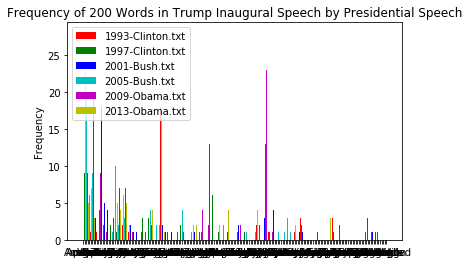

<Figure size 2880x2880 with 0 Axes>

In [15]:
from numpy import arange
from matplotlib import pyplot
from matplotlib import use, pyplot
colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of 200 Words in Trump Inaugural Speech by Presidential Speech')
    pyplot.figure(figsize=(40, 40)) 
    pyplot.show()

speeches = inaugural_text_ids[-7:-1] 
cfdist = nltk.ConditionalFreqDist(
             (speech, word)
             for speech in speeches
             for word in inaugural.words(speech)
             if word in words_200)

counts = {}
for speech in speeches:
    counts[speech] = [cfdist[speech][word] for word in words_200]
bar_chart(speeches, words_200, counts)
 

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Yes, generally, the larger the samples, the more it resembles distributions in other texts. This often holds for more than one language, as well. The graph shows how the zipf law predicts a generally accurate distribution of words as shown in comparison to frequncy by rank. We do see some divergences which may be due to the type of writing (speech) in which uncommon words are often repeated for effect and which are often too short to generate the type of frequency needed to show a clear pattern. Relative frequency in this instance, and as above, is evident in the comparison of the different words frequenies depicted in the chart bars or lines (as described in the textbook). 

Code: https://www.cs.swarthmore.edu/~richardw/classes/cs65/f18/lab01.html

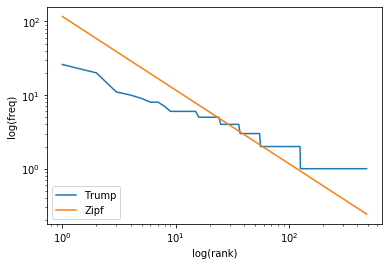

In [16]:
import math
from matplotlib import pylab 

def H_approx(n):
    """
    Returns an approximate value of n-th harmonic number.
    http://en.wikipedia.org/wiki/Harmonic_number
    """
    # Euler-Mascheroni constant
    gamma = 0.57721566490153286060651209008240243104215933593992
    return gamma + math.log(n) + 0.5/n - 1./(12*n**2) + 1./(120*n**4)

words_ = [w.lower() for w in trump_clean_w if w.lower()!='']
counts = u_freq
n = len(counts)
ranks = range(1, n+1)                     # x-axis: the ranks
freqs_ = [freq for (word, freq) in counts] # y-axis: the frequencies
pylab.loglog(ranks, freqs_, label='Trump') #this plots frequency 
pylab.loglog(ranks, [len(words_)/H_approx(n)/i for i in ranks], label='Zipf') 
pylab.xlabel('log(rank)')
pylab.ylabel('log(freq)')
pylab.legend(loc='lower left')
pylab.show()

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.

Sometimes when a corpus is short or unique the top word frequencies diverge from a corpora. This can happen in text without a lot of common words or simply because the comparison runs out of common words (articles and other generic language). Common words show up in similar amounts due to the standard grammar that comprises human language. In this instance, Trump speaks in the vernarcular and is speaking to a wide audience, so one would imagine a fairly typical trend in using common words and then a large jump in the frequency of uncommon words, compared to their typical usage. When compared to other Presidential speaches I would expect to find more possessives and more repetiion of uncommon words. 